In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading training data    
data = np.load('Data/species/species_train.npz')
train_locs = data['train_locs']  # 2D array, rows are number of datapoints and 
                                 # columns are "latitude" and "longitude"
train_ids = data['train_ids']    # 1D array, entries are the ID of the species 
                                 # that is present at the corresponding location in train_locs
species = data['taxon_ids']      # list of species IDe. Note these do not necessarily start at 0 (or 1)
species_names = dict(zip(data['taxon_ids'], data['taxon_names']))  # latin names of species 

ids= pd.DataFrame(train_ids)
ids.columns = ['id']
locs= pd.DataFrame(train_locs)

data_train = pd.concat([ids,locs],axis=1)
data_train.columns = ['id', 'lat', 'long']

id_counts = ids['id'].value_counts().reset_index()
id_counts.columns = ['id', 'Count']
id_counts

,id,Count
0,7576,2000
1,27818,2000
2,180008,2000
3,10243,2000
4,43115,2000
...,...,...
495,41147,51
496,33297,51
497,4661,50
498,29550,50


In [47]:
# Top 5 most frequent IDs
top_5_ids = id_counts.head(5)
print("Top 5 most frequent IDs:\n", top_5_ids)

# Descriptive statistics
print("\nDescriptive statistics for ID counts:")
print(id_counts['Count'].describe())

# Proportion of total occurrences for the top 5 IDs
total_count = id_counts['Count'].sum()
top_5_proportion = top_5_ids['Count'].sum() / total_count * 100
print(f"\nTop 5 IDs contribute {top_5_proportion:.2f}% of all occurrences.")


Top 5 most frequent IDs:
        id  Count
0    7576   2000
1   27818   2000
2  180008   2000
3   10243   2000
4   43115   2000

Descriptive statistics for ID counts:
count     500.000000
mean      544.074000
std       651.769754
min        50.000000
25%        98.750000
50%       222.000000
75%       675.250000
max      2000.000000
Name: Count, dtype: float64

Top 5 IDs contribute 3.68% of all occurrences.


/var/folders/nq/_cp8_y5x5fd8sv7_th97tzs80000gn/T/ipykernel_17323/485734007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='Count', data=top_5_ids, palette='viridis')


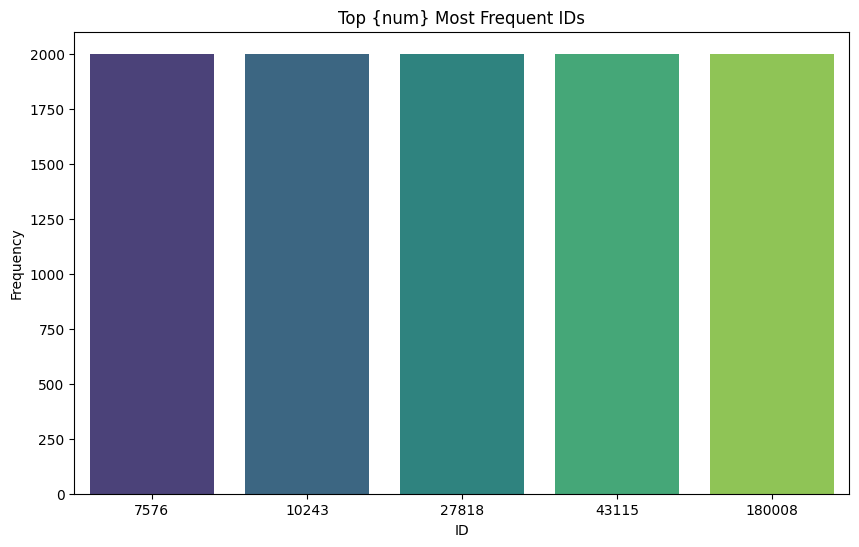

In [55]:

# All top 5 have 2000 entries, so not very useful
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='Count', data=top_5_ids, palette='viridis')
plt.title('Top {num} Most Frequent IDs')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()


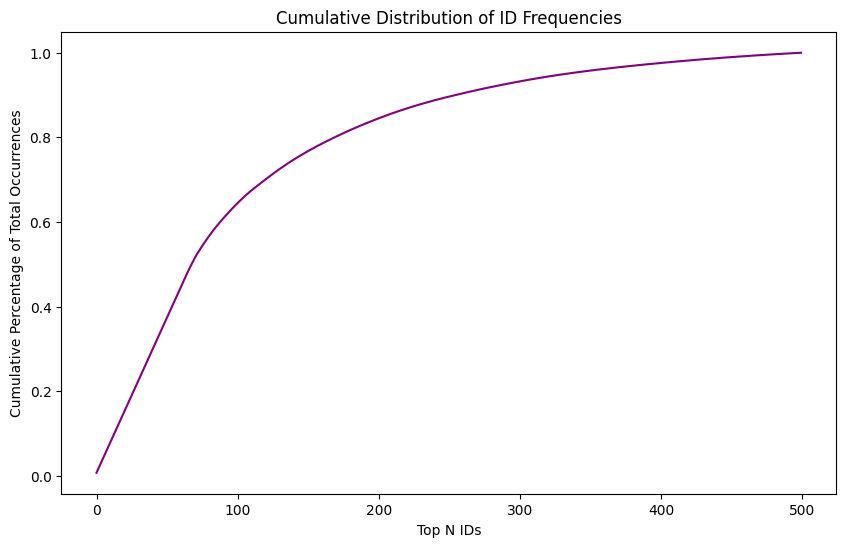

In [49]:
import numpy as np

# Sort counts and compute cumulative distribution
sorted_counts = id_counts['Count'].sort_values(ascending=False).values
cumulative = np.cumsum(sorted_counts) / total_count

plt.figure(figsize=(10, 6))
plt.plot(cumulative, color='purple')
plt.title('Cumulative Distribution of ID Frequencies')
plt.xlabel('Top N IDs')
plt.ylabel('Cumulative Percentage of Total Occurrences')
plt.show()


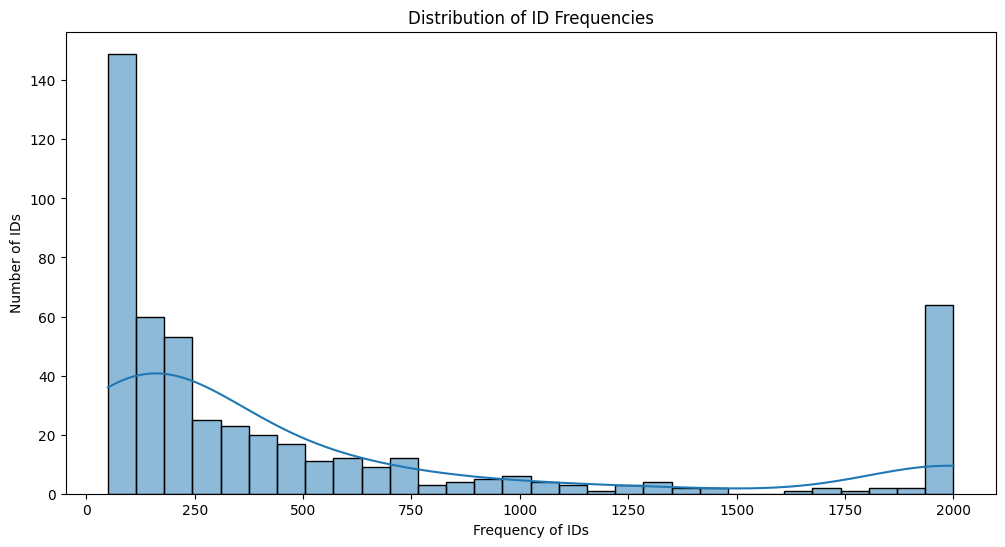

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(id_counts['Count'], bins=30, kde=True)
plt.title('Distribution of ID Frequencies')
plt.xlabel('Frequency of IDs')
plt.ylabel('Number of IDs')
plt.show()
